# Tree 3
Example of a Tree where branches are variable length arrays
A second Tree is created and filled in parallel.
Run this script with
```
  .x tree3.C
```
In the function treer, the first Tree is open.
The second Tree is declared friend of the first tree.
TTree::Draw is called with variables from both Trees.



**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:57 AM.</small></i>

In [1]:
%%cpp -d
#include "TFile.h"
#include "TTree.h"
#include "TRandom.h"
#include "TCanvas.h"

 A helper function is created: 

In [2]:
%%cpp -d
void tree3w() {

   const Int_t kMaxTrack = 500;
   Int_t ntrack;
   Int_t stat[kMaxTrack];
   Int_t sign[kMaxTrack];
   Float_t px[kMaxTrack];
   Float_t py[kMaxTrack];
   Float_t pz[kMaxTrack];
   Float_t pt[kMaxTrack];
   Float_t zv[kMaxTrack];
   Float_t chi2[kMaxTrack];
   Double_t sumstat;

   TFile f("tree3.root","recreate");
   TTree *t3 = new TTree("t3","Reconst ntuple");
   t3->Branch("ntrack",&ntrack,"ntrack/I");
   t3->Branch("stat",stat,"stat[ntrack]/I");
   t3->Branch("sign",sign,"sign[ntrack]/I");
   t3->Branch("px",px,"px[ntrack]/F");
   t3->Branch("py",py,"py[ntrack]/F");
   t3->Branch("pz",pz,"pz[ntrack]/F");
   t3->Branch("zv",zv,"zv[ntrack]/F");
   t3->Branch("chi2",chi2,"chi2[ntrack]/F");

   TFile fr("tree3f.root","recreate");
   TTree *t3f = new TTree("t3f","a friend Tree");
   t3f->Branch("ntrack",&ntrack,"ntrack/I");
   t3f->Branch("sumstat",&sumstat,"sumstat/D");
   t3f->Branch("pt",pt,"pt[ntrack]/F");

   for (Int_t i=0;i<1000;i++) {
      Int_t nt = gRandom->Rndm()*(kMaxTrack-1);
      ntrack = nt;
      sumstat = 0;
      for (Int_t n=0;n<nt;n++) {
         stat[n] = n%3;
         sign[n] = i%2;
         px[n]   = gRandom->Gaus(0,1);
         py[n]   = gRandom->Gaus(0,2);
         pz[n]   = gRandom->Gaus(10,5);
         zv[n]   = gRandom->Gaus(100,2);
         chi2[n] = gRandom->Gaus(0,.01);
         sumstat += chi2[n];
         pt[n]   = TMath::Sqrt(px[n]*px[n] + py[n]*py[n]);
      }
      t3->Fill();
      t3f->Fill();
   }
   t3->Print();
   f.cd();
   t3->Write();
   fr.cd();
   t3f->Write();
}

 A helper function is created: 

In [3]:
%%cpp -d
void tree3r()
{
   TFile *f = new TFile("tree3.root");
   TTree *t3 = (TTree*)f->Get("t3");
   t3->AddFriend("t3f","tree3f.root");
   t3->Draw("pz","pt>3");
}

 A helper function is created: 

In [4]:
%%cpp -d
void tree3r2()
{
   TPad *p = new TPad("p","p",0.6, 0.4, 0.98, 0.8);
   p->Draw(); p->cd();
   TFile *f1 = new TFile("tree3.root");
   TFile *f2 = new TFile("tree3f.root");
   TTree *t3 = (TTree*)f1->Get("t3");
   t3->AddFriend("t3f",f2);
   t3->Draw("pz","pt>3");
}

In [5]:
tree3w();
tree3r();
tree3r2();

******************************************************************************
*Tree    :t3        : Reconst ntuple                                         *
*Entries :     1000 : Total =         7018766 bytes  File  Size =    4403660 *
*        :          : Tree compression factor =   1.55                       *
******************************************************************************
*Br    0 :ntrack    : ntrack/I                                               *
*Entries :     1000 : Total  Size=       4647 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :stat      : stat[ntrack]/I                                         *
*Entries :     1000 : Total  Size=    1002090 bytes  File Size  =      16050 *
*Baskets :       31 : Basket Size=      32000 bytes  Compression=  60.65     *
*...................................................

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Draw all canvases 

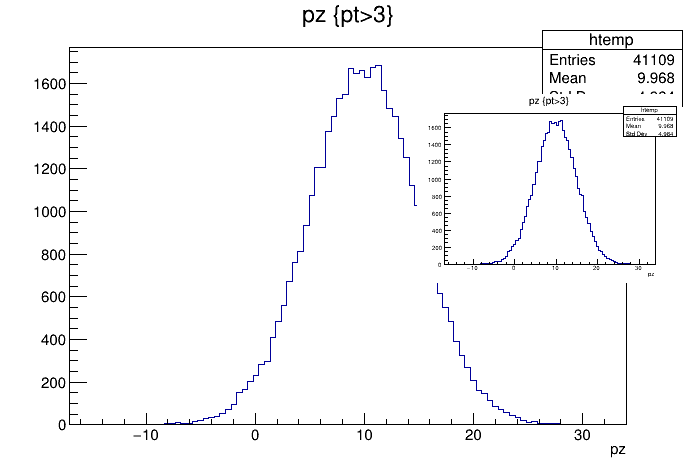

In [6]:
gROOT->GetListOfCanvases()->Draw()